In [26]:
import requests
import praw
import pandas as pd
from bs4 import BeautifulSoup as bs
from monkeylearn import MonkeyLearn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from collections import Counter

reddit = praw.Reddit(client_id='U9mkNlCxxefAXA', client_secret='-8omzmq-RoY_Sa2b6iGh0FSdv9U', user_agent='web scraper')

In [4]:
hot_posts = reddit.subreddit('whoop').hot(limit=10)
for post in hot_posts:
    print(post.title)

Collection of Whoop Teams
Wiki created for Frequently Asked Questions
Charging my Whoop and Teenage Daughter Had an Observation
Has anyone tried this Apollo wearable thing that claims to improve HRV?
Heart rate accuracy w sports like BJJ and boxing
Activity selection impact on heart rate monitoring/calc?
Do we think this is COVID?
Vibration on iOS when I do anything on my phone since setting up the app
Buying as a Gift - Membership Question
Replacement band alternatives


In [5]:
posts = []
whoop_subreddit = reddit.subreddit('whoop')
for post in whoop_subreddit.hot(limit=100):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Collection of Whoop Teams,38,eoleux,whoop,https://www.reddit.com/r/whoop/comments/eoleux...,137,Hi Everyone. If you would like to include your...,1.579038e+09
1,Wiki created for Frequently Asked Questions,39,gi4fxc,whoop,https://www.reddit.com/r/whoop/comments/gi4fxc...,7,Pls add the frequently asked questions so we c...,1.589288e+09
2,Charging my Whoop and Teenage Daughter Had an ...,7,jj4s0c,whoop,https://www.reddit.com/r/whoop/comments/jj4s0c...,3,If you have a teenager in your house than you ...,1.603846e+09
3,Has anyone tried this Apollo wearable thing th...,26,jioben,whoop,https://i.imgur.com/IKqDSo9.jpg,47,,1.603778e+09
4,Heart rate accuracy w sports like BJJ and boxing,2,jiz6cm,whoop,https://www.reddit.com/r/whoop/comments/jiz6cm...,9,There are a lot of posts about the inaccuracy ...,1.603826e+09
...,...,...,...,...,...,...,...,...
95,Can't upload a profile picture : Any solution ?,2,jf7f1n,whoop,https://www.reddit.com/r/whoop/comments/jf7f1n...,1,"Tried this on my phone & on my laptop, both in...",1.603289e+09
96,MENTAL HEALTH MATTERS (Team code: COMM-270E33),9,jexnhl,whoop,https://www.reddit.com/r/whoop/comments/jexnhl...,2,Hi everyone! I've been a big Whoop stan since ...,1.603254e+09
97,Noice,22,jeptvq,whoop,https://i.imgur.com/zXNyfDJ.jpg,6,,1.603231e+09
98,Amazing workout: clean the garage,7,jey6cz,whoop,https://www.reddit.com/r/whoop/comments/jey6cz...,6,I hit 13.8 doing just under 90 minutes of clea...,1.603255e+09


In [61]:
ml = MonkeyLearn('b1d53765815fa6a7910f0000a54b59c62abf9a58')
title_data = posts['title'].tolist()
body_data = posts['body'].tolist()
model_id = 'cl_pi3C7JiL'
title_result = ml.classifiers.classify(model_id, title_data)
body_result = ml.classifiers.classify(model_id, body_data)

PlanQueryLimitError: Error PLAN_QUERY_LIMIT: Request Throttled. You do not have enough queries left to perform this action. 54 queries are required, but you have 0 queries remaining.

In [62]:
classifications = []
confidences = []
for elem in result.body:
    classifications.append(elem['classifications'][0]['tag_name'])
    confidences.append(elem['classifications'][0]['confidence'])

In [63]:
print(classifications)

['Neutral', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 

In [64]:
print(confidences)

[0.83, 0.788, 0.874, 0.797, 0.683, 0.858, 0.851, 0.655, 0.716, 0.86, 0.649, 0.613, 0.793, 0.884, 0.507, 0.917, 0.807, 0.478, 0.739, 0.693, 0.82, 0.648, 0.742, 0.591, 0.549, 0.718, 0.754, 0.952, 0.658, 0.523, 0.538, 0.812, 0.965, 0.811, 0.581, 0.519, 0.896, 0.999, 0.689, 0.926, 0.949, 0.529, 0.961, 0.587, 0.593, 0.849, 0.858, 0.939, 0.617, 0.818, 0.893, 0.696, 0.502, 0.963, 0.789, 0.506, 0.86, 0.804, 0.489, 0.492, 0.857, 0.998, 0.929, 0.79, 0.796, 0.634, 0.882, 0.493, 0.503, 0.556, 0.685, 0.851, 0.541, 0.837, 0.731, 0.764, 0.924, 0.613, 0.801, 0.48, 0.837, 0.837, 0.99, 0.658, 0.504, 0.841, 0.494, 0.514, 0.74, 0.645, 0.786, 0.464, 0.732, 0.913, 0.882, 0.857, 0.809, 0.813, 0.986, 0.829]


<AxesSubplot:>

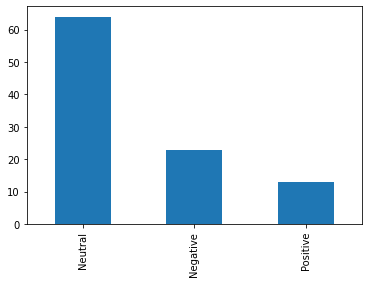

In [65]:
pd.Series(classifications).value_counts().plot(kind='bar')

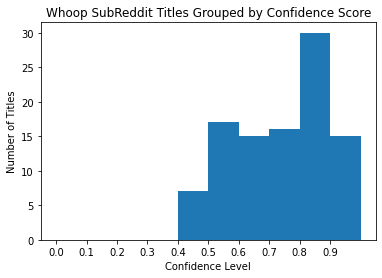

In [66]:
plt.hist(confidences, bins=10, range=(0,1), histtype='bar')
plt.ylabel('Number of Titles')
plt.xlabel('Confidence Level')
plt.title('Whoop SubReddit Titles Grouped by Confidence Score')
plt.xticks(np.arange(0, 1, step=0.1))
plt.show()